In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('adult_dataset-1.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df_1=df[df.workclass=='?']
df_1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:
df = df[df['workclass'] !='?']
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [ ]:
df= df[df['occupation'] !='?']
df= df[df['native.country'] !='?']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [ ]:
le = preprocessing.LabelEncoder() 
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [ ]:
df =  df.drop(df_categorical.columns, axis=1)
df = pd.concat([df,df_categorical], axis=1)
df.tail()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
32556,22,310152,10,0,0,40,2,15,4,10,1,4,1,38,0
32557,27,257302,12,0,0,38,2,7,2,12,5,4,0,38,0
32558,40,154374,9,0,0,40,2,11,2,6,0,4,1,38,1
32559,58,151910,9,0,0,40,2,11,6,0,4,4,0,38,0
32560,22,201490,9,0,0,20,2,11,4,0,3,4,1,38,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int64
 7   education       30162 non-null  int64
 8   marital.status  30162 non-null  int64
 9   occupation      30162 non-null  int64
 10  relationship    30162 non-null  int64
 11  race            30162 non-null  int64
 12  sex             30162 non-null  int64
 13  native.country  30162 non-null  int64
 14  income          30162 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [ ]:
df['income'] = df['income'].astype('category')

## **`Model Building and Evaluation`**




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('income', axis=1)
y = df['income']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=99)
X_train.tail()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
10712,31,185528,10,0,0,35,2,15,0,11,3,4,0,38
3426,35,145704,9,3942,0,35,2,11,2,9,5,4,0,38
14561,44,326232,4,0,0,48,2,5,0,5,1,4,1,38
25431,18,184693,10,0,0,20,2,15,4,7,3,4,0,25
31627,34,167893,10,0,0,64,2,15,2,9,0,4,1,38


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(max_depth =5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_default = dt_default.predict(X_test)
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [ ]:
print(confusion_matrix(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

[[6553  314]
 [1039 1143]]
0.8504807161012267


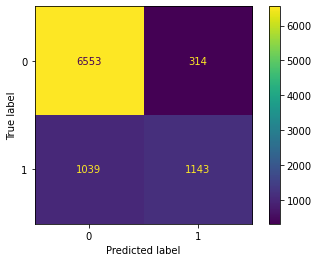

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_default,X_test,y_test)
plt.show()  

<hr>

In [ ]:
from sklearn import tree
features = list(df.columns[1:])
cls= [">=50  ","<=50"]

In [ ]:
print(features)
print("-----------------------------")
print(cls)

['fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
-----------------------------
['>=50  ', '<=50']


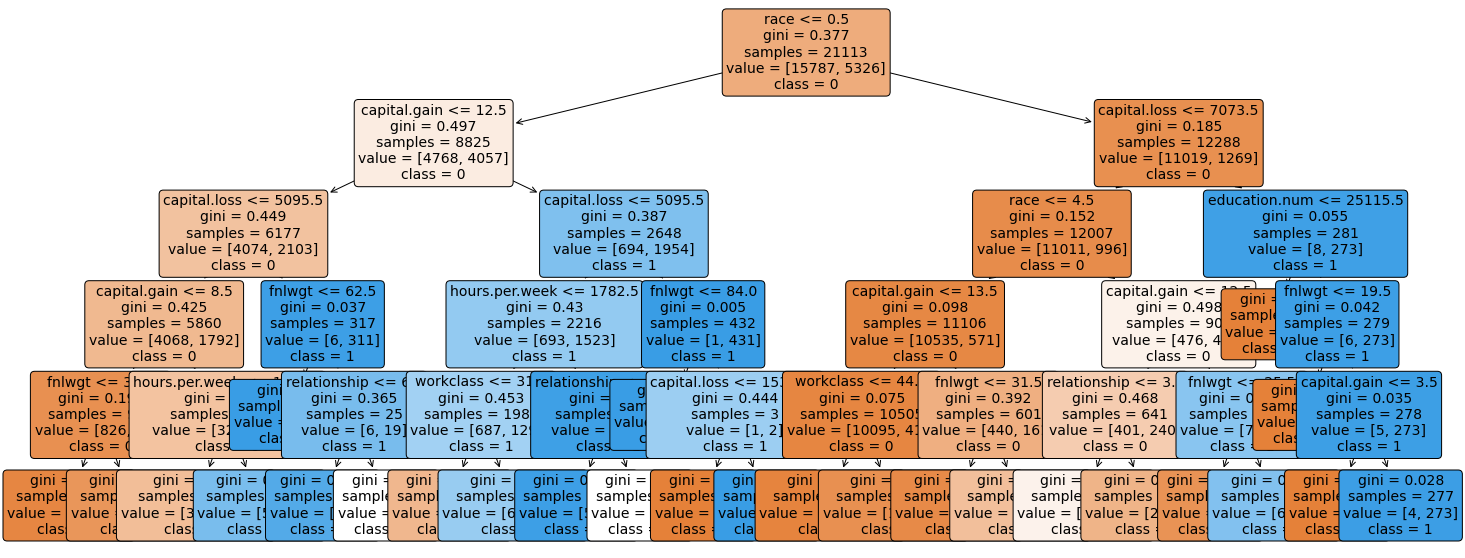

In [ ]:
plt.figure(figsize=(25,10))
plt.tight_layout()
a = tree.plot_tree (dt_default, 
                    feature_names=features,
                    class_names=["0","1"],
                    filled=True,
                    rounded=True,
                    fontsize=14)

In [ ]:
text_representation = tree.export_text(dt_default)
print(text_representation)

|--- feature_10 <= 0.50
|   |--- feature_2 <= 12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- feature_2 <= 8.50
|   |   |   |   |--- feature_0 <= 37.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  37.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  8.50
|   |   |   |   |--- feature_4 <= 1846.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  1846.00
|   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  5095.50
|   |   |   |--- feature_0 <= 62.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  62.50
|   |   |   |   |--- feature_9 <= 6.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_9 >  6.50
|   |   |   |   |   |--- class: 0
|   |--- feature_2 >  12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- feature_4 <= 1782.50
|   |   |   |   |--- feature_5 <= 31.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  31.00
|   |   |   |   |   |--- class: 1
|   |   |   |-

In [ ]:
from sklearn.model_selection import  KFold,GridSearchCV
n_folds = 5
parameters = {'max_depth': range(1,40)}
dtree = DecisionTreeClassifier(criterion="gini", random_state=100)
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy", return_train_score= True)
tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [ ]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015847,0.004670,0.003866,0.000947,1,{'max_depth': 1},0.747810,0.747810,0.747573,0.747750,...,0.747738,0.000087,39,0.747721,0.747721,0.747780,0.747735,0.747735,0.747738,0.000022
1,0.020215,0.003350,0.004709,0.001167,2,{'max_depth': 2},0.812219,0.818612,0.820507,0.825675,...,0.819969,0.004538,16,0.821906,0.820308,0.819834,0.818542,0.819253,0.819969,0.001134
2,0.027064,0.004274,0.004754,0.002312,3,{'max_depth': 3},0.828558,0.834241,0.834478,0.836570,...,0.834273,0.003115,12,0.835998,0.834577,0.834458,0.833758,0.833758,0.834510,0.000819
3,0.037112,0.005578,0.004431,0.000817,4,{'max_depth': 4},0.832583,0.840871,0.842529,0.842729,...,0.840193,0.003860,9,0.841622,0.839491,0.844997,0.838908,0.845421,0.842088,0.002707
4,0.052914,0.006287,0.006675,0.001639,5,{'max_depth': 5},0.834241,0.844897,0.847265,0.842729,...,0.843319,0.004858,7,0.844287,0.844227,0.849319,0.841572,0.849683,0.845818,0.003165


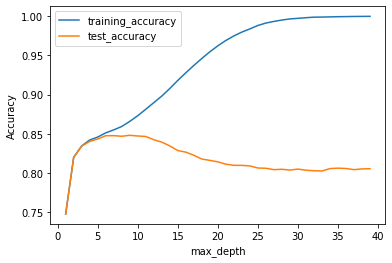

In [ ]:
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training_accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

as we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds. 

Thus, it is clear that the model is overfitting the training data if the max_depth is too high. Next, let's see how the model behaves with other hyperparameters.

<hr>

In [ ]:
n_folds = 5 
parameters = {'min_samples_leaf':range(5,200,20)}
dtree = DecisionTreeClassifier(criterion ='gini', random_state=100)
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring='accuracy', return_train_score=True )
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [ ]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.084904,0.003749,0.004367,0.000196,5,{'min_samples_leaf': 5},0.825716,0.827848,0.819560,0.826149,...,0.823616,0.003696,10,0.915335,0.911782,0.915335,0.912083,0.913149,0.913537,0.001537
1,0.072536,0.007059,0.003978,0.000070,25,{'min_samples_leaf': 25},0.841819,0.851291,0.839451,0.842018,...,0.844788,0.004651,6,0.868028,0.869686,0.871226,0.867503,0.869872,0.869263,0.001343
2,0.067304,0.005449,0.004252,0.000841,45,{'min_samples_leaf': 45},0.843003,0.849159,0.846555,0.851018,...,0.848293,0.003194,1,0.861042,0.860154,0.862581,0.860399,0.863714,0.861578,0.001362
3,0.059969,0.001139,0.003948,0.000074,65,{'min_samples_leaf': 65},0.841108,0.852711,0.845371,0.851492,...,0.845830,0.005589,2,0.857549,0.855773,0.858555,0.855189,0.858149,0.857043,0.001328
4,0.062557,0.006392,0.004132,0.000430,85,{'min_samples_leaf': 85},0.838030,0.849159,0.845371,0.851492,...,0.845214,0.004834,3,0.853108,0.853108,0.855654,0.854005,0.854597,0.854095,0.000963


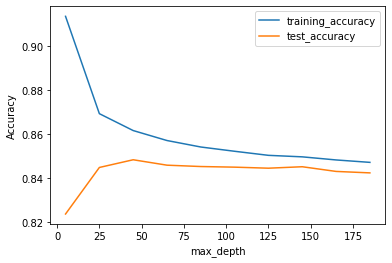

In [ ]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="training_accuracy")
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

<hr>

In [ ]:
n_folds = 5
parameters = {'min_samples_split':range(5,200,20)}
dtree = DecisionTreeClassifier(criterion ='gini', random_state=100)
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring='accuracy', return_train_score=True )
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [ ]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.093650,0.003533,0.004415,0.000247,5,{'min_samples_split': 5},0.811982,0.811035,0.818376,0.811701,...,0.812296,0.003296,10,0.969094,0.969331,0.969509,0.970458,0.971227,0.969924,0.000800
1,0.087633,0.002522,0.004126,0.000072,25,{'min_samples_split': 25},0.825006,0.825243,0.830215,0.822596,...,0.826126,0.002581,9,0.906927,0.906513,0.906986,0.906577,0.911847,0.907770,0.002047
2,0.089687,0.007352,0.004734,0.001192,45,{'min_samples_split': 45},0.835188,0.839687,0.830215,0.827333,...,0.834225,0.004783,8,0.890527,0.890053,0.889816,0.888521,0.896335,0.891051,0.002725
3,0.084778,0.005967,0.005062,0.001311,65,{'min_samples_split': 65},0.839451,0.845844,0.837556,0.833728,...,0.840098,0.004360,7,0.883896,0.882238,0.883245,0.880765,0.884258,0.882880,0.001261
4,0.110470,0.000401,0.006195,0.000274,85,{'min_samples_split': 85},0.846081,0.853895,0.838977,0.837281,...,0.844314,0.005898,6,0.877383,0.877442,0.879515,0.875081,0.880706,0.878025,0.001940


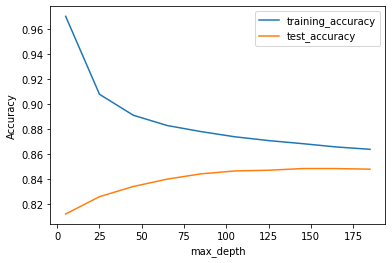

In [ ]:
plt.figure()
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="training_accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

<hr>

## **`Grid Search to Find Optimal Hyperparameters`**



In [ ]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}
n_folds = 5
dtree = DecisionTreeClassifier(criterion ='gini', random_state=100)
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid,cv=n_folds, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040324,0.003078,0.003665,0.000235,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
1,0.039865,0.001818,0.003841,0.000640,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
2,0.039591,0.002805,0.003858,0.000642,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
3,0.038425,0.002028,0.003521,0.000047,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
4,0.060058,0.002953,0.003814,0.000216,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3
5,0.067135,0.007467,0.004213,0.000682,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3
6,0.055793,0.000183,0.003770,0.000096,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.852475,0.847502,0.854098,0.845571,0.848956,0.003661,5
7,0.058944,0.003100,0.004569,0.001590,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.852475,0.847502,0.854098,0.845571,0.848956,0.003661,5
8,0.036808,0.002680,0.003836,0.000308,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.844897,0.847502,0.845097,0.847466,0.843841,0.004927,9
9,0.035730,0.001714,0.003754,0.000280,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.844897,0.847502,0.845097,0.847466,0.843841,0.004927,9


In [ ]:
print("best_accuracy", grid_search.best_score_)
print(grid_search.best_params_)

best_accuracy 0.8510400232064759
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


<hr>

**Running the model with best parameters obtained from grid search.**

In [ ]:
clf_gini = DecisionTreeClassifier(criterion ='gini', 
                                  random_state=100,
                                  max_depth=10,
                                  min_samples_leaf=50, 
                                  min_samples_split=50   
)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [ ]:
clf_gini.score(X_test,y_test)

0.850922753895458

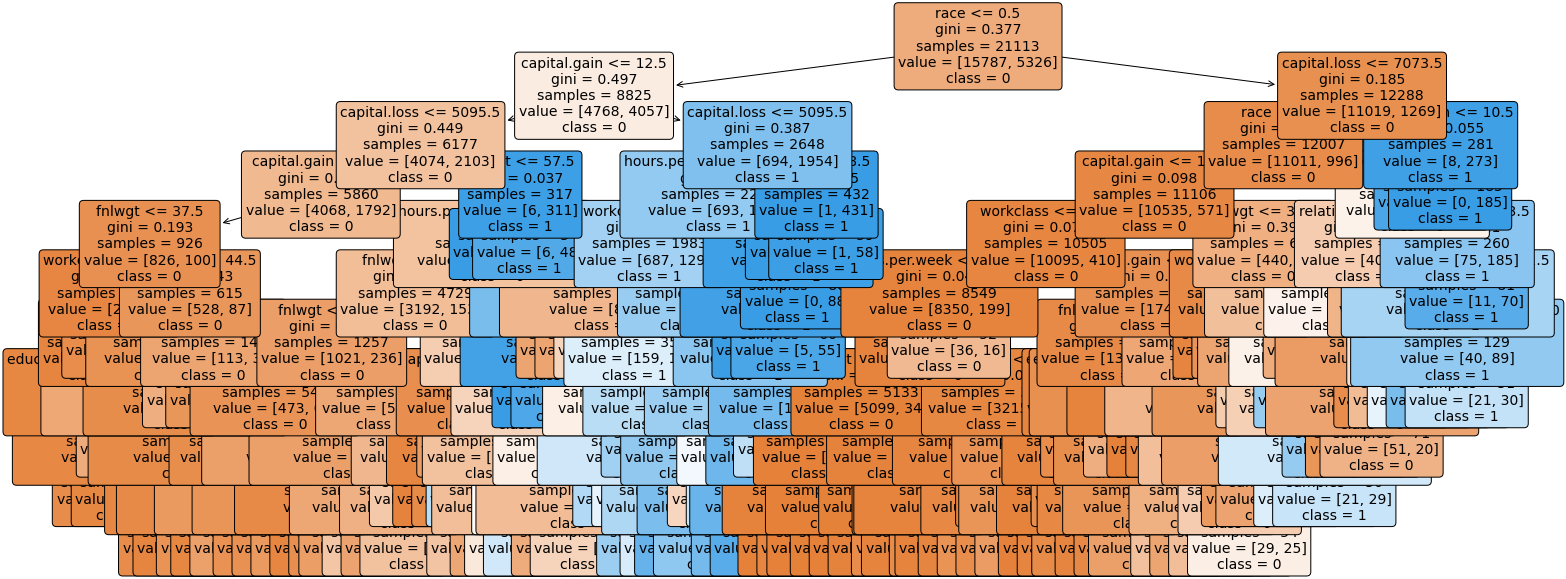

In [ ]:
from sklearn import tree
plt.figure(figsize=(25,10))

plt.tight_layout()
a = tree.plot_tree(clf_gini, 
                    feature_names=features,
                    class_names=["0","1"],
                    filled=True,
                    rounded=True,
                    fontsize=14)

You can see that this tree is too complex to understand. Let's try reducing the max_depth and see how the tree looks.

In [ ]:
clf_gini = DecisionTreeClassifier(criterion ='gini', 
                                  random_state=100,
                                  max_depth=3,
                                  min_samples_leaf=50, 
                                  min_samples_split=50   
)
clf_gini.fit(X_train, y_train)
clf_gini.score(X_test,y_test)

0.8393192617968837

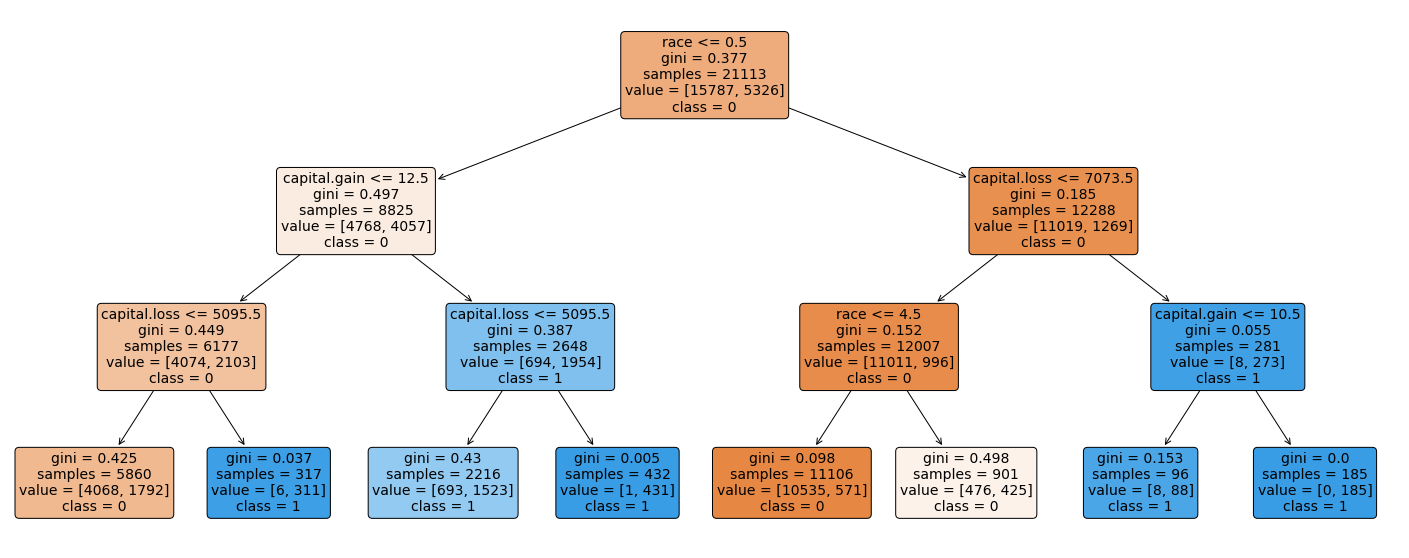

In [ ]:
plt.figure(figsize=(25,10))
plt.tight_layout()
a = tree.plot_tree(clf_gini, 
                    feature_names=features,
                    class_names=["0","1"],
                    filled=True,
                    rounded=True,
                    fontsize=14)

In [ ]:
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6867
           1       0.77      0.47      0.59      2182

    accuracy                           0.84      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.84      0.82      9049



[[6564  303]
 [1151 1031]]


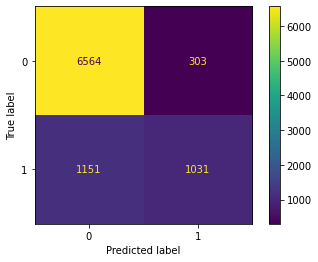

In [ ]:
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf_gini,X_test,y_test)
plt.show() 

## **`Watch Video 7: Post Pruning Decision Tree`**


In [ ]:
path = clf_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities =path.ccp_alphas, path.impurities 

In [ ]:
ccp_alphas

array([0.00000000e+00, 4.15771003e-05, 3.29981250e-03, 1.29901716e-02,
       1.39448764e-02, 2.05367356e-02, 2.77360949e-02, 6.18175275e-02])

In [ ]:
Accuracy_Train, Accuracy_Test = [],[]
for ccp_alpha in ccp_alphas:
    
    clf = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    Train_pred=clf.predict(X_train)
    Test_pred=clf.predict(X_test)
    
    Accuracy_Train.append(accuracy_score(y_train, Train_pred))
    Accuracy_Test.append(accuracy_score(y_pred, Test_pred))
    
    


<Figure size 720x288 with 0 Axes>

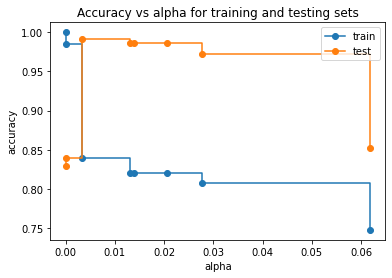

In [ ]:
train_scores = Accuracy_Train
test_scores = Accuracy_Test

plt.figure(figsize=(10,4))

fig, ax = plt.subplots()

ax.set_xlabel("alpha")

ax.set_ylabel("accuracy")

ax.set_title("Accuracy vs alpha for training and testing sets") 

ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")

ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend()

plt.show()

From the above plot, we can see that between first and second alpha values, we get the maximum test accuracy. Although our train accuracy has decreased to 0.8, our model is now more generalized and it will perform better on unseen data.


So now we will add ccp_alpha as  as another hyperparameter along with grid searched parameters in our deciscion tree




In [ ]:
final_dt= DecisionTreeClassifier(ccp_alpha=0.01, 
                                  random_state=100,
                                  max_depth=10,
                                  min_samples_leaf=50, 
                                  min_samples_split=50 )
final_dt.fit(X_train, y_train)  
  
Train_pred=final_dt.predict(X_train)

Test_pred=final_dt.predict(X_test)

print(accuracy_score(y_train, Train_pred))
print(accuracy_score(y_test, Test_pred))

0.8344148155165064
0.8393192617968837


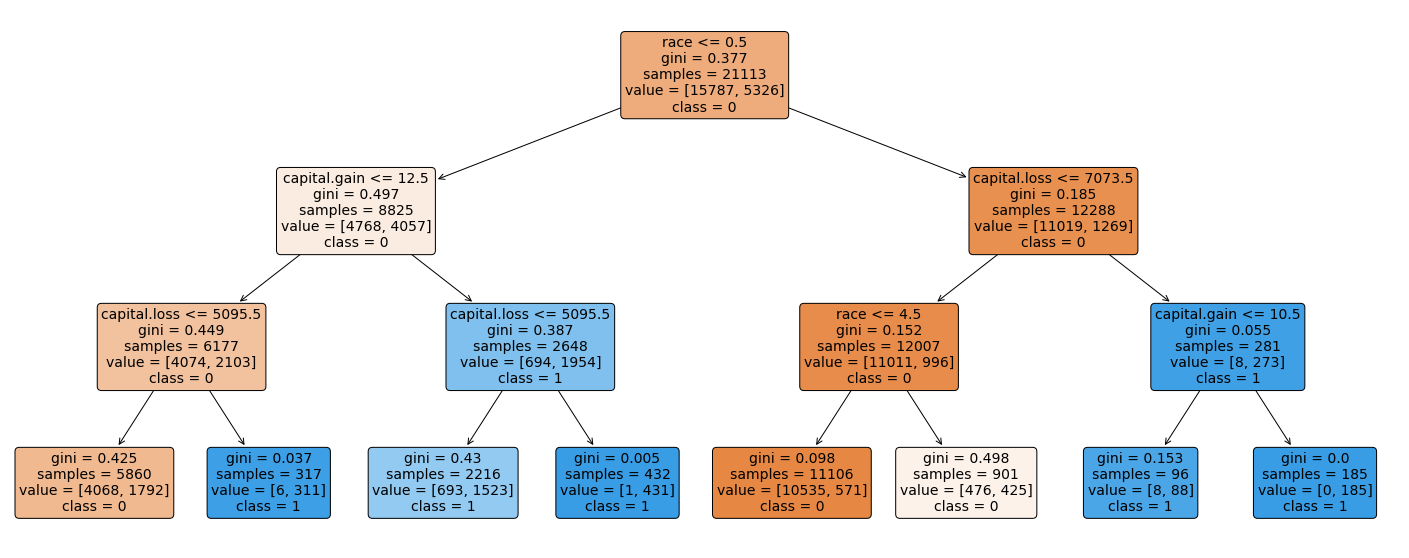

In [ ]:
plt.figure(figsize=(25,10))

plt.tight_layout()
a = plt.tight_layout()
a = tree.plot_tree(clf_gini, 
                    feature_names=features,
                    class_names=["0","1"],
                    filled=True,
                    rounded=True,
                    fontsize=14)


## **`Conclusion`**

1.  Decision trees assist analysts in evaluating upcoming choices. The tree creates a visual representation of all possible outcomes, rewards and follow-up decisions in one document. 
2. Each subsequent decision resulting from the original choice is also depicted on the tree, so you can see the overall effect of any one decision. 
3. As you go through the tree and make choices, you will see a specific path from one node to another and the impact a decision made now could have down the road.




## **`Summary`** 

1. Decision trees are composed of three main parts—decision nodes i.e denoting choice,denoting probability and denoting outcomes.
2. Decision trees can be used to deal with complex datasets, and can be pruned if necessary to avoid overfitting.
3. Despite having many benefits, decision trees are not suited to all types of data, e.g. continuous variables or imbalanced datasets.
4. They are popular in data analytics and machine learning, with practical applications across sectors from health, to finance, and technology.